In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.graph_objects as go
from matplotlib import rcParams
from scipy import stats
rcParams['axes.titlepad'] = 20 



In [2]:
error_category_df = pd.read_csv('data/survivor-Total.csv', delimiter=';')

In [3]:
error_category_df['Q1']=error_category_df['Q1'].fillna('Absent').apply(lambda x: x.split("|")[0].strip(' '))
error_category_df['Q2']=error_category_df['Q2'].fillna('Absent').apply(lambda x: x.split("|")[0].strip(' '))
error_category_df['Q3']=error_category_df['Q3'].fillna('Absent').apply(lambda x: x.split("|")[0].strip(' '))
error_category_df['Q4']=error_category_df['Q4'].fillna('Absent').apply(lambda x: x.split("|")[0].strip(' '))
error_category_df['Schema']=error_category_df['Schema'].fillna('0')
error_category_df['Properties']=error_category_df['Properties'].fillna('0')
error_category_df['Q6']=error_category_df['Q6'].fillna('Absent').apply(lambda x: x.split("|")[0].strip(' '))
error_category_df['Q7']=error_category_df['Q7'].fillna('Absent').apply(lambda x: x.split("|")[0].strip(' '))
error_category_df['Q8']=error_category_df['Q8'].fillna('Absent').apply(lambda x: x.split("|")[0].strip(' '))
error_category_df['Q9']=error_category_df['Q9'].fillna('Absent').apply(lambda x: x.split("|")[0].strip(' '))
error_category_df['Q10']=error_category_df['Q10'].fillna('Absent').apply(lambda x: x.split("|")[0].strip(' '))
error_category_df['Q11']=error_category_df['Q11'].fillna('Absent').apply(lambda x: x.split("|")[0].strip(' '))
error_category_df['Q12']=error_category_df['Q12'].fillna('Absent').apply(lambda x: x.split("|")[0].strip(' '))
error_category_df['Q13']=error_category_df['Q13'].fillna('Absent').apply(lambda x: x.split("|")[0].strip(' '))
error_category_df['Q14']=error_category_df['Q14'].fillna('Absent').apply(lambda x: x.split("|")[0].strip(' '))
error_category_df['Q15']=error_category_df['Q15'].fillna('Absent').apply(lambda x: x.split("|")[0].strip(' '))
error_category_df.head()

,TEST ID,consent,What language can you program in? (List the different languages separated by a comma),"How do you rate your knowledge of relational databases (e.g., MySQL))?(1 = never heard of it, 5 = can use it in a professional environment)","How do you rate your knowledge of NoSQL databases (e.g., MongoDB, Cassandra)?(1 = never heard of it, 5 = can use it in a professional environment)",Which one in particular?,"How do you rate your knowledge of other graph structures beside property graphs (e.g., RDF and SPARQL)?(1 = never heard of it, 5 = can use it in a professional environment)",Are you knowledgable of any of the following graph query languages?,Q1,Q2,...,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15
0,student-27,Accept,"C,C#,C++,Java, Python, PHP, R, JS, Angular, Ty...",4,4,"Apache Cassandra, MongoDB, Couchbase",2,SQL/PGQ,Correct,Correct,...,Semantic Return,Semantic Return,"Semantic Pattern, Semantic Where, Semantic Return",Semantic Where,"Semantic Where , Semantic Return",Correct,Semantic Pattern,"Semantic Pattern, Semantic Return",Correct,Complication
1,student-28,Accept,"C#, JS, TS, C/C++, python",4,2,MongoDB,3,OpenCypher,Correct,Correct,...,Semantic Return,Semantic Return,"Semantic Pattern, Semantic Where",Complication,"Semantic Where , Semantic Return",Correct,Semantic Pattern,"Semantic Pattern, Semantic Return",Correct,Complication
2,student-29,Accept,"Javascript, Java, PHP, C, OCaml, C#, Dart",5,2,MongoDB,1,NaN,Other,Other,...,Complication,Semantic Return,"Semantic Pattern, Semantic Where, Semantic Return",Semantic Where,Semantic Return,Complication,Semantic Pattern,Semantic Return,Correct,"Semantic Where, Semantic Return"
3,student-30,Accept,"Java, C/C++, Python",2,2,MongoDB,1,NaN,Correct,Correct,...,Complication,Complication,"Semantic Where, Semantic Return",Correct,Semantic Where,Correct,Correct,Semantic Return,Correct,"Semantic Pattern, Semantic Return"
4,student-33,Accept,"C, SQL, Cypher, Python, OCaml, C#, C++, Java, ...",4,2,Other,1,"OpenCypher, GraphQL, SQL/PGQ",Correct,Correct,...,Correct,Correct,"Semantic Pattern,Semantic Return",Semantic Pattern,Semantic Return,Correct,Semantic Pattern,Semantic Return,Correct,"Semantic Pattern, Semantic Return"


In [4]:
error_category_df.shape

(13, 25)

In [5]:
melted_error_category_df = error_category_df[['Q1','Q2','Q3','Q4','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13','Q14','Q15']].melt( var_name='Query', value_name='Label')
melted_error_category_df=melted_error_category_df.fillna('Absent')

melted_error_category_df['Label'] =melted_error_category_df['Label'].str.split(',')

# Explode the DataFrame to create new rows
melted_error_category_df = melted_error_category_df.explode('Label')
melted_error_category_df['Label'] = melted_error_category_df['Label'].apply(lambda x: x.strip(' '))
# Display the resulting DataFrame
label_counts = melted_error_category_df['Label'].value_counts()

print(label_counts)

Label
Correct             65
Semantic Return     52
Semantic Pattern    33
Semantic Where      25
Complication        21
No Answer            9
Absent               5
Other                2
SyntaxError          1
Name: count, dtype: int64


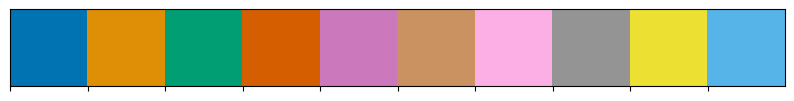

In [6]:
colorblind_palette = sns.color_palette("colorblind")
sns.palplot(colorblind_palette)

In [7]:
custom_palette = {
    'Correct': colorblind_palette[2],
    'Complication': colorblind_palette[9],
    'Other': colorblind_palette[0],
    'SyntaxError':colorblind_palette[7],
    'Semantic Return':colorblind_palette[1],
    'Semantic Where':colorblind_palette[5],
    'Semantic Pattern':colorblind_palette[3],
    'No Answer':'Black',
}

hatches =  {
    'Correct': '-',
    'Complication': '-',
    'Other': '-',
    'SyntaxError':'-',
    'Semantic Return':'/',
    'Semantic Where':'x',
    'Semantic Pattern':'o',
    'No Answer':'-',
}

# Analysis of the category of errors

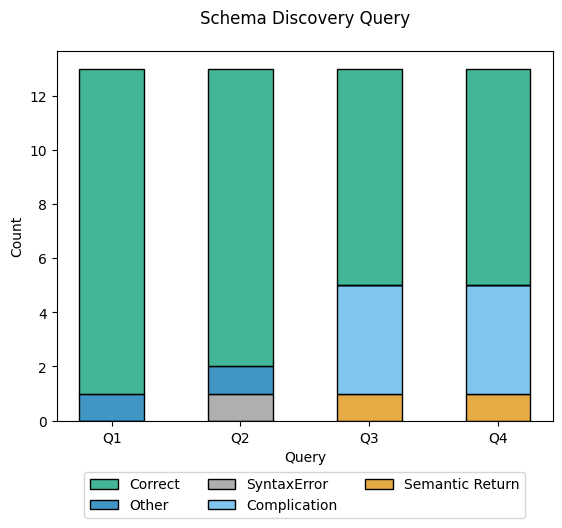

In [9]:
schema_discovery_df = error_category_df[['Q1','Q2','Q3','Q4']]
# Melting the DataFrame
melted_df = schema_discovery_df.melt( var_name='Query', value_name='Label')
# Display the resulting DataFrame
fig, ax = plt.subplots()
sns.histplot(
            data=melted_df,
            x="Query",
            hue="Label", multiple="stack",
            binwidth=.2,
              bins='auto',binrange=None, discrete=None,
            shrink=.5,
            stat="count",
            palette=custom_palette).set(title='Schema Discovery Query')
sns.move_legend(
                ax, "upper center",
                bbox_to_anchor=(.5, -0.12), ncol=3, title=None, frameon=True,
            )
plt.show()
#fig.savefig('fig/Schema_Discovery_Categories.png', bbox_inches='tight')



In [10]:
counts = melted_df.value_counts()
counts

Query  Label          
Q1     Correct            12
Q2     Correct            11
Q3     Correct             8
Q4     Correct             8
Q3     Complication        4
Q4     Complication        4
Q1     Other               1
Q2     Other               1
       SyntaxError         1
Q3     Semantic Return     1
Q4     Semantic Return     1
Name: count, dtype: int64

In [11]:
analytical_part1_df = error_category_df[['Q6','Q7','Q8','Q9','Q10']]
# Melting the DataFrame
melted_df = analytical_part1_df.melt( var_name='Query', value_name='Label')

melted_df['Label'] =melted_df['Label'].str.split(',')

# Explode the DataFrame to create new rows
melted_df = melted_df.explode('Label')
melted_df['Label'] = melted_df['Label'].apply(lambda x: x.strip(' '))
# Display the resulting DataFrame
label_counts = melted_df['Label'].value_counts()

print(label_counts)
print(str(70/5) + " Absent students in the second part")

melted_df = melted_df[melted_df['Label'] != 'Absent']




Label
Semantic Return     35
Semantic Where      22
Semantic Pattern    12
Complication         9
Correct              7
Absent               5
Name: count, dtype: int64
14.0 Absent students in the second part


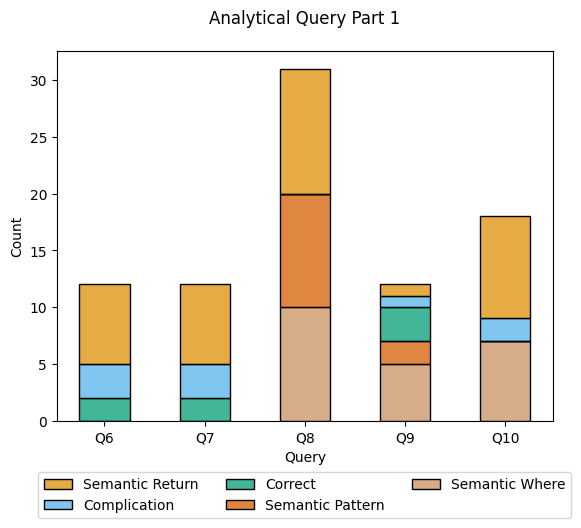

In [12]:
fig, ax = plt.subplots()

sns.histplot(
            data=melted_df,
            x="Query",
            hue="Label", multiple="stack",
            binwidth=.2,
              bins='auto',binrange=None, discrete=None,
            shrink=.5,
            
            palette=custom_palette).set(title='Analytical Query Part 1')




sns.move_legend(
                ax, "upper center",
                bbox_to_anchor=(.5, -0.12), ncol=3, title=None, frameon=True,
            )
plt.show()
#fig.savefig('fig/analytical1_Categories.png', bbox_inches='tight')

In [13]:
counts = melted_df.value_counts()
counts

Query  Label           
Q8     Semantic Return     11
       Semantic Where      10
       Semantic Pattern    10
Q10    Semantic Return      9
Q7     Semantic Return      7
Q10    Semantic Where       7
Q6     Semantic Return      7
Q9     Semantic Where       5
Q7     Complication         3
Q6     Complication         3
Q9     Correct              3
Q7     Correct              2
Q6     Correct              2
Q9     Semantic Pattern     2
Q10    Complication         2
Q9     Complication         1
       Semantic Return      1
Name: count, dtype: int64

In [14]:
analytical_part2_df = error_category_df[['Q11','Q12','Q13','Q14','Q15']]
# Melting the DataFrame
melted_df = analytical_part2_df.melt( var_name='Query', value_name='Label')

melted_df['Label'] =melted_df['Label'].str.split(',')

# Explode the DataFrame to create new rows
melted_df = melted_df.explode('Label')
melted_df['Label'] = melted_df['Label'].apply(lambda x: x.strip(' '))
# Display the resulting DataFrame
label_counts = melted_df['Label'].value_counts()

print(label_counts)
print(str(230/5) + " Absent students in the second part")

melted_df = melted_df[melted_df['Label'] != 'Absent']
melted_df = melted_df[melted_df['Label'] != '.']




Label
Semantic Pattern    21
Correct             19
Semantic Return     15
No Answer            9
Complication         4
Semantic Where       3
Name: count, dtype: int64
46.0 Absent students in the second part


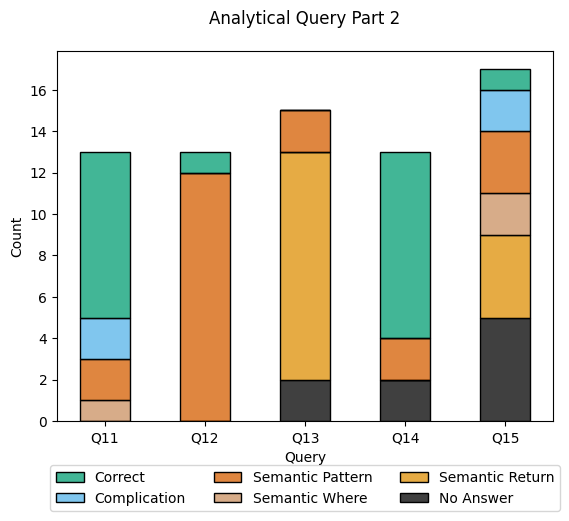

In [15]:
fig, ax = plt.subplots()

sns.histplot(
            data=melted_df,
            x="Query",
            hue="Label", multiple="stack",
            binwidth=.2,
              bins='auto',binrange=None, discrete=None,
            shrink=.5,
            palette=custom_palette).set(title='Analytical Query Part 2')




sns.move_legend(
                ax, "upper center",
                bbox_to_anchor=(.5, -0.1), ncol=3, title=None, frameon=True,
            )
plt.show()
#fig.savefig('fig/analytical2_Categories.png', bbox_inches='tight')


In [16]:
counts = melted_df.value_counts()
counts

Query  Label           
Q12    Semantic Pattern    12
Q13    Semantic Return     11
Q14    Correct              9
Q11    Correct              8
Q15    No Answer            5
       Semantic Return      4
       Semantic Pattern     3
Q14    No Answer            2
Q15    Complication         2
Q14    Semantic Pattern     2
Q11    Complication         2
Q13    Semantic Pattern     2
       No Answer            2
Q11    Semantic Pattern     2
Q15    Semantic Where       2
       Correct              1
Q12    Correct              1
Q11    Semantic Where       1
Name: count, dtype: int64